# Introduction

In this lab enhancement, we will use a property dataset from Kaggle to predict house prices by implementing and comparing three(3) regression models: simple linear regression, multiple linear regression, and polynomial regression. At the same time, we will also compare using different feature sets which are 2 features, 5 features, and all features. Performance metrics such as Mean Square Error(MSE) and R-squared(R²) to evaluate the model performance. Last but not least, we will identify the most suitable model that provides the lowest error and best predictive accuracy.

# 1.0 Data Preprocessing

## Load Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Import Dataset

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data = pd.DataFrame(data)

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The first five rows of the dataset are shown in the table above to give an overview of its structure and content.

## Explore Dataset

In [5]:
data.shape

(545, 13)

This dataset has 545 rows and 13 columns.

In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Above are the column names of the dataset.

In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

This dataset does not contain any missing values.

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


1. Price
    - Average Price: The property costs around RM4.77 million.
    - Price Range: Prices vary widely, from as low as RM1.75 million to as high as RM13.3 million.
    - Most Common: Half of the properties are priced below RM4.34 million, and 75% are below RM5.74 million.

2. Area
    - Average Area: The property is about 5150.54 square units in size.
    - Area Range: Sizes range from 1650 to 16200 square units.
    - Most Common: Half of the properties are smaller than 4600 square units, and 75% are smaller than 6360 square units.

3. Bedrooms
    - Average Bedrooms: Most properties have around 3 bedrooms.
    - Bedroom Range: Properties have between 1 and 6 bedrooms.
    - Most Common: Half of the properties have 3 bedrooms or fewer.

4. Bathrooms
    - Average Bathrooms: Most properties have about 1.29 bathrooms(1 bathroom).
    - Bathroom Range: Properties have between 1 and 4 bathrooms.
    - Most Common: Half of the properties have 1 bathroom.

5. Stories
    - Average Stories: Most properties have around 1.81 stories.
    - Stories Range: Properties have between 1 and 4 stories.
    - Most Common: Half of the properties have 2 stories or fewer.

6. Parking
    - Average Parking: Most properties have about 0.69 parking spaces(1 parking space).
    - Parking Range: Properties have between 0 and 3 parking spaces.
    - Most Common: Half of the properties have 0 parking spaces.


<br> Summary:
- Price and Area: There is a wide range in both price and area, indicating diverse property options.

- Bedrooms and Bathrooms: Most properties are modest in size, typically having around 3 bedrooms and 1 bathroom.

- Stories and Parking: Properties are generally low-rise (1-2 stories) and may not always have parking spaces.

## Encoding

Most machine learning models such as linear regression work with numerical data. They cannot directly process categorical data like 'yes' or 'no'. Encoding converts these categories into numerical values (1 for 'yes' and 0 for 'no') so that the models can process them.

"Since the features 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', and 'mainroad' are binary with only 'yes' and 'no' as possible values, we can use label encoding to convert them to 1 for 'yes' and 0 for 'no'."

In [9]:
map_column = {
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea',
    'mainroad'
}

for col in map_column:
    data[col] = data [col].map(dict({'yes':1,'no':0}))

The feature 'furnishingstatus' has three values: 'furnished', 'semi-furnished', and 'unfurnished'. Since these values are categorical and do not have an inherent order, we use one-hot encoding to convert them into binary columns. This approach ensures that the model does not misinterpret the categorical values as having a numerical relationship.

In [10]:
data = pd.get_dummies(data, columns = ['furnishingstatus'])

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


After one-hot encoding, we convert the binary columns to integers to save memory and keep the data consistent.

In [12]:
data[['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']] = data[['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']].astype(int)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [13]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

After one-hot encoding the categorical features, the dataset expands to 15 columns.

## Visualization

### Correlation Heatmap

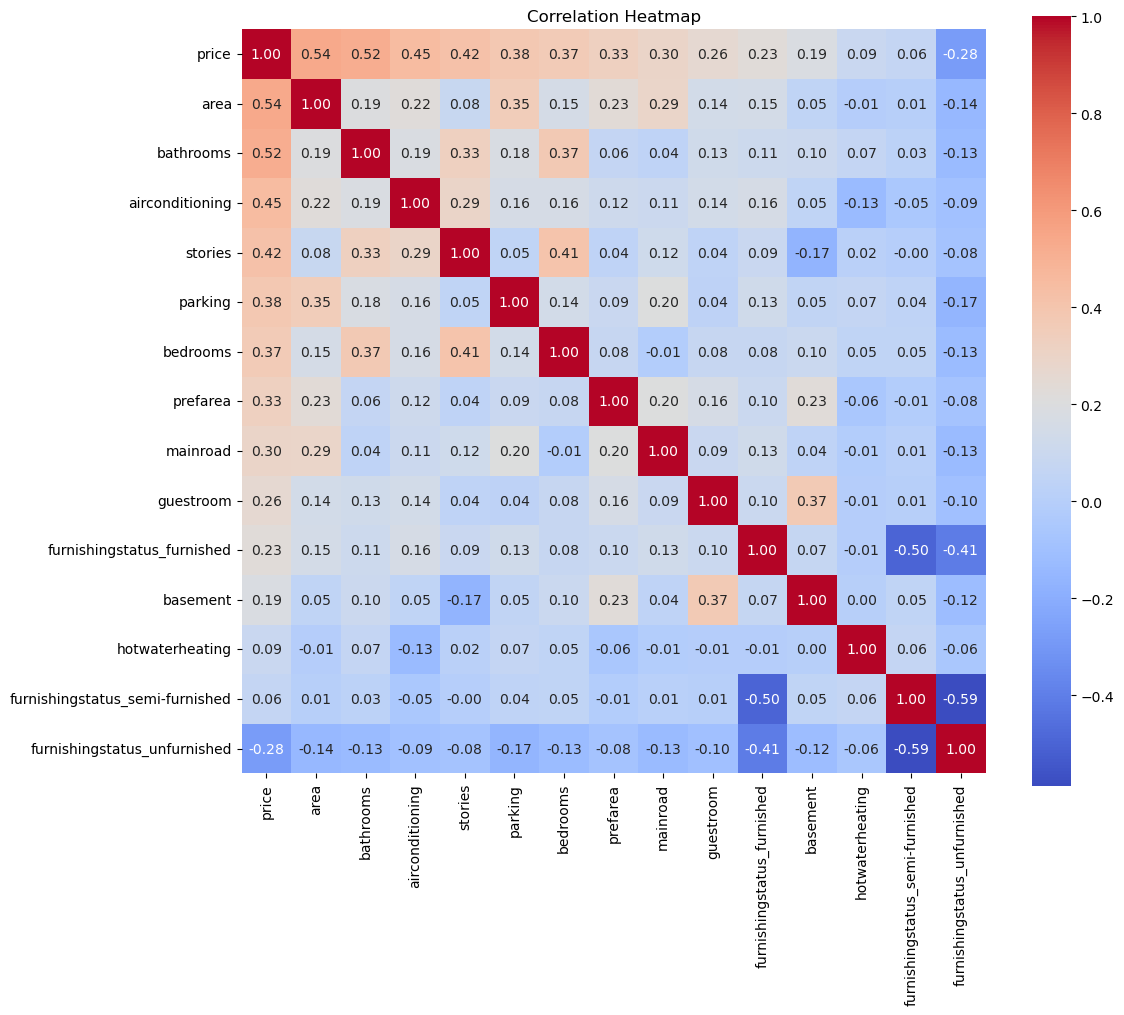

In [14]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Focus on the correlation values between the target variable (price) and all other features in descending order
target_corr = correlation_matrix['price'].sort_values(ascending=False)

# Reorder the correlation matrix based on the sorted target correlations
sorted_correlation_matrix = correlation_matrix.loc[target_corr.index, target_corr.index]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

Based on the heatmap above, 

1. We observe that 'area' has a moderate positive correlation with 'price', suggesting that larger properties tend to have higher prices. 
2. The second highest correlation is with 'bathrooms', indicating that the number of bathrooms also significantly influences the property price. 
3. 'airconditioning' and 'stories' are also have moderate positive relationship with 'price'. This means that the higher the value of air-condition and stories, the higher the property price. 
4. Additionally, there is a very weak positive relationship between 'hotwaterheating' and 'furnishingstatus_semi-furnished' with 'price'. 
5. We can also see that there is a weak negative correlation between 'furnishingstatus_unfurnished' and 'price', which means that unfurnished properties are slightly associated with lower prices.

### Boxplot

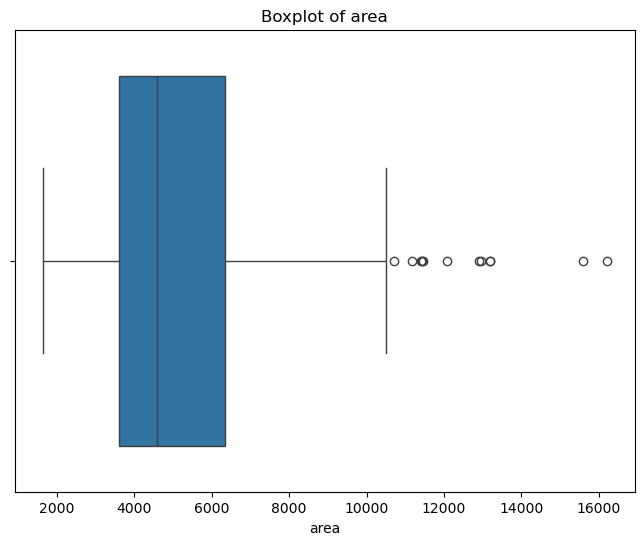

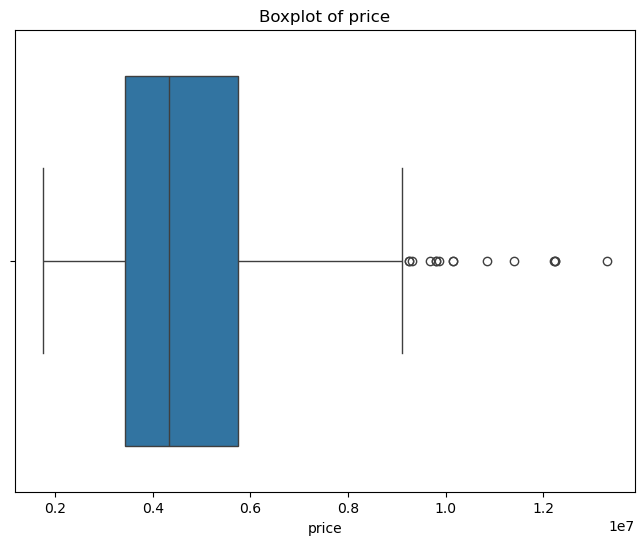

In [15]:
columns = ['area', 'price']

for x in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=x)
    plt.title(f'Boxplot of {x}')
    plt.show()

From the boxplot above, both 'area' and 'price' are skewed to the right (positively skewed). However, there are several outliers which indicates that a small number of very large area properties and a few properties have higher prices than most of the properties . This creates a long tail on the right side of the distribution.

# 2.0 Model Building

## Simple Linear Regression

Simple linear regression models the relationship between one independent variable and the dependent variable using a straight line. It predict the relationship between one input variable and one output variable using a straight line.

### Before Log Transformation

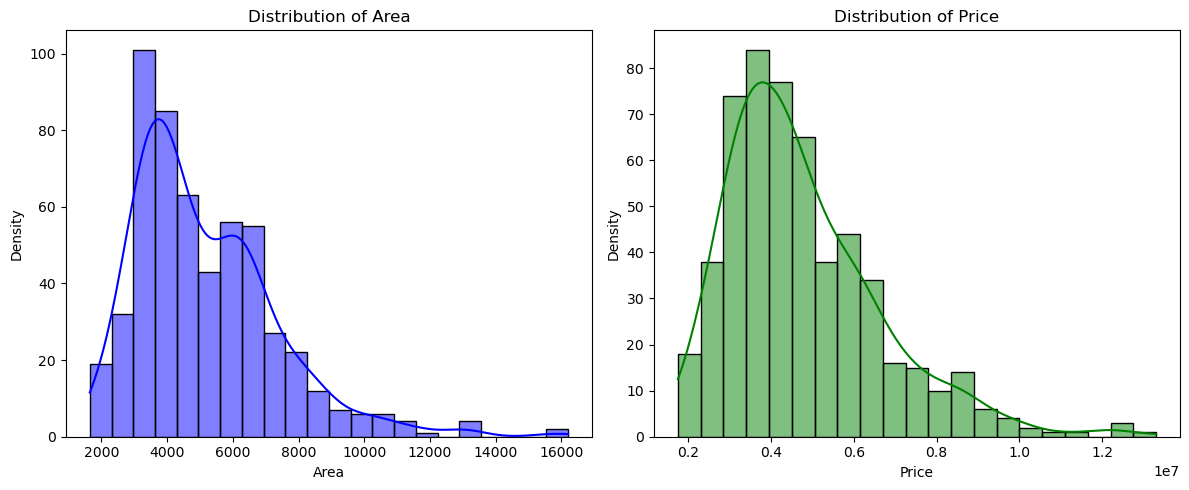

In [16]:
plt.figure(figsize=(12, 5))

# Plot distribution of area
plt.subplot(1, 2, 1)
sns.histplot(data['area'], kde=True, color='blue', edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Density')
plt.title('Distribution of Area')

# Plot distribution of price
plt.subplot(1, 2, 2)
sns.histplot(data['price'], kde=True, color='green', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

In [17]:
# Calculate skewness for 'area'
area_skewness = data['area'].skew()
print(f"Skewness of Area: {area_skewness}")

# Calculate skewness for 'price'
price_skewness = data['price'].skew()
print(f"Skewness of Price: {price_skewness}")

Skewness of Area: 1.321188343153483
Skewness of Price: 1.2122388370279802


From the distribution of the histograms for 'area' and 'price', we can see that both are right-skewed. To confirm this, we calculated the skewness, which is 1.32 for 'area' and 1.21 for 'price'. This indicates that the data is positively skewed, meaning there are a few properties with significantly larger areas and higher prices, pulling the distribution to the right.

In [18]:
X = data[['area']]  # Independent variable
y = data['price']   # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Print the model's coefficient (slope) and intercept
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): 425.72984193878284
Intercept: 2512254.2639593435


The <b>coefficient</b> is 425.73 means for every 1 square foot increase in area, the price of the property increases by approximately RM 425.73. For example, if the area increases by 100 square feet, the price is expected to increase by 425.73 × 100 = RM42573.

<br>The <b>intercept</b> is 2512254.26 means this is the predicted price when the area is 0. In other words, if a property has 0 area, the model predicts its price to be approximately RM 2512254.26.

<br> Note:
The intercept often does not have a meaningful real-world interpretation because a property with 0 area does not exist. It is more of a mathematical starting point for the regression line.

The linear regression equation is 
<center> Price = (Coefficient × Area) + Intercept </center>

Substitute the value: 
<center> Price = 425.73 × Area + 2512254.26</center> 

If a property has an area of 3000 square feet, the predicted price would be:

<center>Price = 425.73 × 3000 + 2512254.26 </center>

The price will be RM3789444.26

In [21]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 3675286604768.185
R-squared: 0.27287851871974644


<b>MSE(Mean Square Error)</b> measures the average squared difference between the actual prices and the predicted prices. A lower MSE value indicates better predictions, as it means the model's predictions are closer to the true values. In this case, the MSE is 3675286604768.19.

The target variable (prices) has very large values (prices in millions). Since MSE squares the errors, these large values result in an extremely high MSE. To address this, consider scaling the data to reduce the impact of large values and make the error metric more interpretable.

<b>The R² score (Coefficient of Determination)</b> measures how well the model explains the variance in the target variable. A higher R² score indicates a better fit. In this case, the R² score of 0.273 means that only 27.3% of the variation in 'price' is explained by the 'area'.

The low R² score suggests that 'area' alone might not be sufficient to explain the variation in 'price'. There might be have other factors such as air conditioning, number of bedrooms, and number of stories play a significant role. Additionally, the relationship between area and price might not be strictly linear, and a simple linear regression model may not be capturing the complexity of the data.

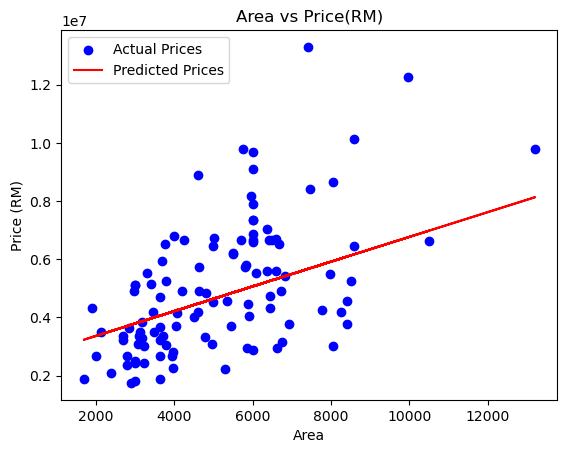

In [22]:
# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price (RM)')
plt.title('Area vs Price(RM)')
plt.legend()
plt.show()

1. Perfect Prediction Line:
    - If points are on this line indicate perfect predictions.

2. Points Above the Line:
    - If points are above the diagonal line, the model is underpredicting (predicted price < actual price).

3. Points Below the Line:
    - If points are below the diagonal line, the model is overpredicting (predicted price > actual price)

From the scatter plot above,

1. The red line represents the linear regression model. It shows the predicted price based on the area according to the model. The line slopes upward, indicating that the model predicts higher prices for larger properties. This also validate that there is a positive correlation between area and price.

2. The blue dots are scattered around the red line. This indicates that while the linear model captures the general trend, there is variability in the actual prices. There are still other factors besides area might also influence property prices.

3. The blue dots do not align perfectly with the red line, indicating that the relationship between Area and Price has variability that is not fully explained by the simple linear regression model.

4. There are outliers which might indicate unusual pricing for certain properties or noise in the data.

In [23]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4060000,5024060
1,6650000,5279498
2,3710000,4232202
3,6440000,4640903
4,2800000,4198144
5,4900000,5373158
6,5250000,6139472
7,4543000,4636646
8,2450000,3891618
9,3353000,3661724


From the table above, 

1. Overpredictions:
    - The model overpredicts prices in some cases (row 0: predicted RM5024060 vs. actual RM4060000).
    - This means the model estimates higher prices than the actual values.

2. Underpredictions:
    - The model underpredicts prices in other cases (row 2: predicted RM4232202 vs. actual RM4710000).
    - This means the model estimates lower prices than the actual values.

3. Close Predictions:
    - Some predictions are close to the actual prices (row 8: predicted RM4636646 vs. actual RM4543000).
    - This indicates the model performs well for certain data points.

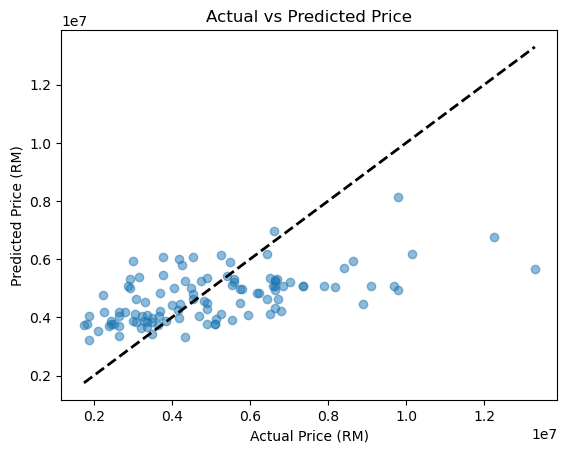

In [24]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price (RM)')
plt.ylabel('Predicted Price (RM)')
plt.title('Actual vs Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

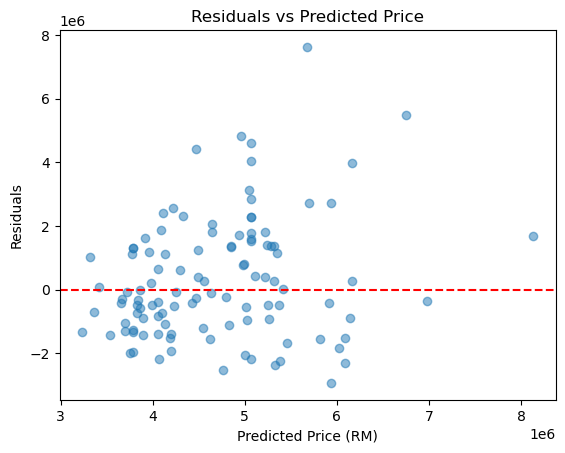

In [25]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero
plt.xlabel('Predicted Price (RM)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()

From figure above,

1. The residuals are randomly scattered around 0. This indicates the model’s errors are random.

2. There’s no curved pattern, funnel shape, or trend in the residuals.

3. The red dashed line at 0 serves as the baseline, and most residuals are clustered around this line. This means the model's predictions are generally close to the actual values.

4. A few residuals are far from zero (above 6e6), showing that the model underpredicts significantly for some high-priced properties. As predicted prices increase, the spread of residuals seems to widen. This suggests the model might be less accurate for higher-priced properties.


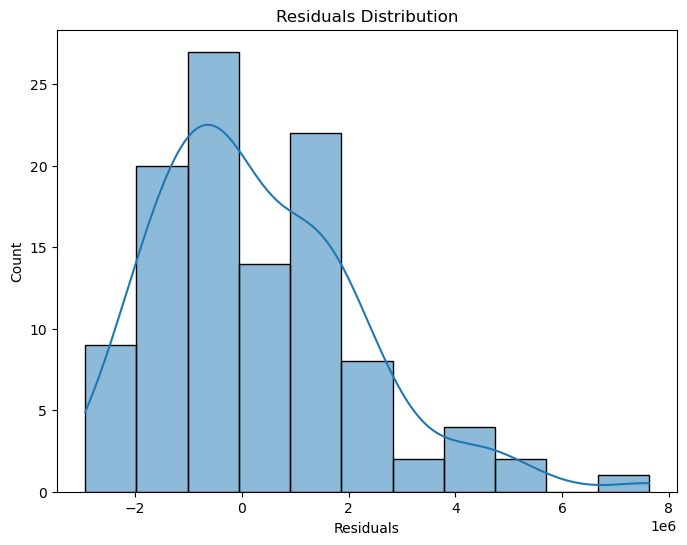

In [26]:
# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

From the histogram above,

1. The residuals range from -2e6(-2 million) to 8e6(8 million). A positive residual indicates underprediction and a negative residual indicates overprediction.

2. The distribution is skewed to the right. This means there are a few larger positive residuals (underprediction) compared to the negative ones (overrprediction).

3. The KDE line peaking near 0 indicates the model is performing well overall, with most predictions close to the actual values. However, the skewness implies that errors are not perfectly random.

4. The highest count of residuals is close to 0. This means that the model's predictions are pretty close to the actual values for most data points.


### After Log Transformation

Since the MSE value is very large, we apply a log transformation to the target variable (price) to reduce the impact of large values and stabilize the variance, making the error metric more interpretable and improving model performance.

In [27]:
# Log transform of price and area variables
data['price'] = np.log(data['price'])
data['area'] = np.log(data['area'])

In [28]:
X = data[['area']]  # Independent variable
y = data['price']   # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

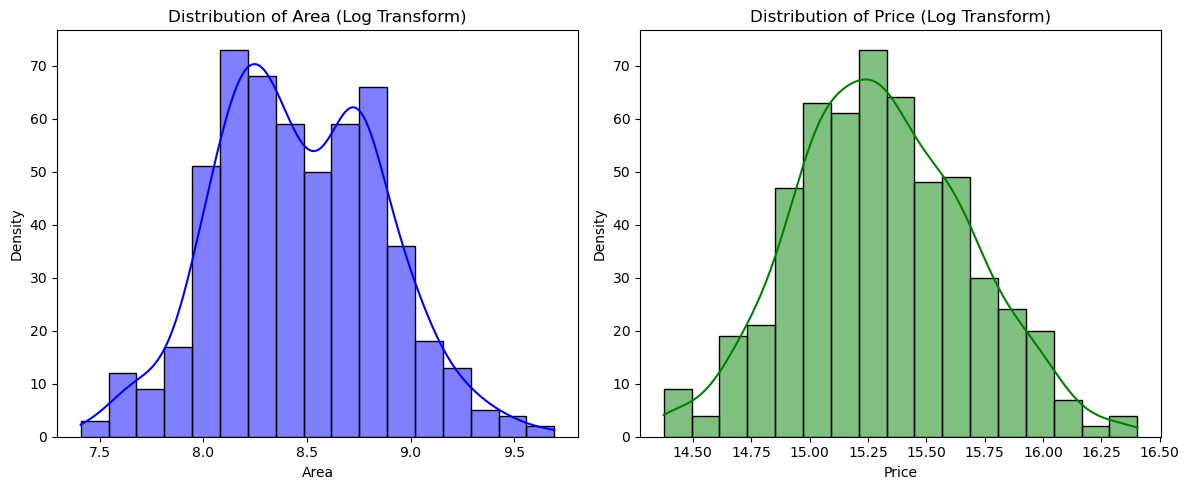

In [29]:
plt.figure(figsize=(12, 5))

# Plot distribution of area
plt.subplot(1, 2, 1)
sns.histplot(data['area'], kde=True, color='blue', edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Density')
plt.title('Distribution of Area (Log Transform)')

# Plot distribution of price
plt.subplot(1, 2, 2)
sns.histplot(data['price'], kde=True, color='green', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Price (Log Transform)')

plt.tight_layout()
plt.show()

In [30]:
# Calculate skewness for 'area'
area_skewness = data['area'].skew()
print(f"Skewness of Area: {area_skewness}")

# Calculate skewness for 'price'
price_skewness = data['price'].skew()
print(f"Skewness of Price: {price_skewness}")

Skewness of Area: 0.1335202187004955
Skewness of Price: 0.14086257299872787


From the distribution of the histograms for 'area' and 'price', we can see that the 'area' appears to be bimodal, with two distinct peaks. This suggests the presence of two subgroups in the data such as 8.3 and 8.7(on the log scale), which means these 2 are the most common size ranges for properties. Moreover, 'price' is close to a normal distribution. To confirm this, we calculated the skewness, which is 0.14 for 'price'. The skewness value of 'price' indicate that the data is approximately symmetric, with a slight tendency to be right-skewed. This suggests that while most properties has prices clustered around the mean, there are a few properties with higher prices, pulling the distribution slightly to the right. Lastly, this also prove that log transform helps make the data easier to analyze by "smoothing out" the distribution.


In [31]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Print the model's coefficient (slope) and intercept
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): 0.513687039585888
Intercept: 10.951914476117604


The <b>coefficient</b> is 0.5137 means for every 1-unit increase in area, the log of price increases by 0.5137. This translates to a 51.37% increase in price for every 1-unit increase in area.

<br>The <b>intercept</b> is 10.9519 means this is the predicted value of log(price) when the area is 0. In other words, if a property has 0 area, the model predicts its price to be approximately RM 10.9519.

To interpret this in the original scale, we need to exponentiate it:
<center> e^10.9519 ≈ RM57,000 </center>

In [33]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.12886473062467238
R-squared: 0.33261392963450076


The <b>Mean Square Error (MSE) </b> is now much smaller (0.1289), indicating that the model’s predictions are closer to the actual values. This is a direct result of the log transformation, which reduced the impact of large values and made the errors smaller.

The <b>The R² score (Coefficient of Determination)</b> value is 0.3326, meaning that 33.26% of the variance in the log-transformed price is explained by the independent variable (area). Even though 33.26% is still relatively low, but it is an improvement over our earlier R-squared value. This suggests that the log transformation helped the model capture more of the relationship between the features and the target variable.

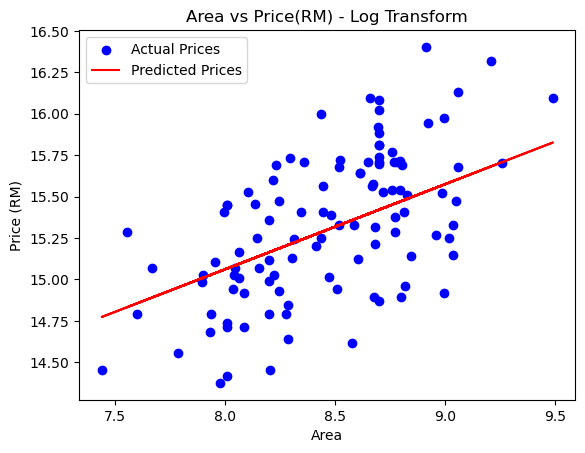

In [34]:
# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price (RM)')
plt.title('Area vs Price(RM) - Log Transform')
plt.legend()
plt.show()

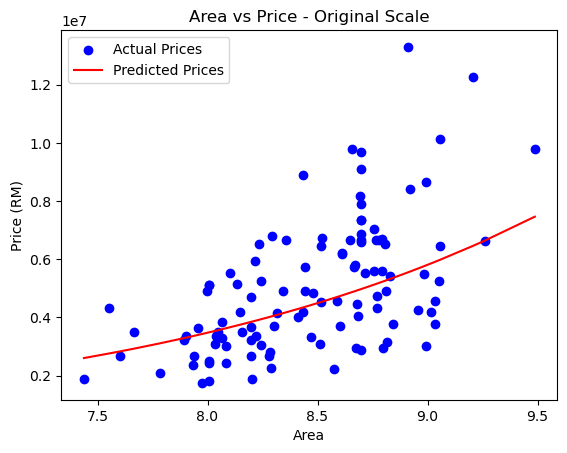

In [35]:
# Convert X_test to a NumPy array
X_test_array = X_test.to_numpy() if hasattr(X_test, "to_numpy") else X_test

# Back-transform actual and predicted prices
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

# Sort X_test and corresponding predictions
sorted_indices = np.argsort(X_test_array.flatten())  # Flatten ensures 1D array for sorting
X_test_sorted = X_test_array.flatten()[sorted_indices]  # Sort X_test
y_pred_sorted = y_pred_original[sorted_indices]  # Sort predictions accordingly

# Visualize the regression line
plt.scatter(X_test_array, y_test_original, color='blue', label='Actual Prices') 
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted Prices')  
plt.xlabel('Area')
plt.ylabel('Price (RM)')
plt.title('Area vs Price - Original Scale')
plt.legend()
plt.show()


From the scatter plot above, 

1. As in the previous plot, the general trend remains a positive correlation between area and price. This indicates that larger properties tend to have higher prices on average.

2. The red line seems to have some curvature. This indicates that the relationship between area and price might not be perfectly linear. In other words, the price increase per unit area might not be constant. The price increase might be faster for smaller properties and slower for larger ones.

In [36]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.412109
1,15.710127,15.461859
2,15.126542,15.217572
3,15.678039,15.327086
4,14.845130,15.207298
5,15.404746,15.478958
6,15.473739,15.600870
7,15.329098,15.326058
8,14.711599,15.104216
9,15.025366,15.010559


1. The predicted prices are now more closer to the actual prices, indicating the model is performing better than before. 

2. There is a slight overprediction in rows 0, 2, 4, 5, 6, 8 and a slight underprediction in rows 1, 3, 7, 9.

3. The residuals (difference between actual and predicted prices) are relatively small, indicating the model’s predictions are fairly accurate.

Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [37]:
results = pd.DataFrame({
    'Actual Price (RM)': np.exp(y_test),  # Actual prices from the test set
    'Predicted Price (RM)': np.exp(y_pred)  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4059999,4936212
1,6650000,5188002
2,3709999,4063566
3,6439999,4533869
4,2800000,4022030
5,4900000,5277472
6,5250000,5961724
7,4542999,4529208
8,2450000,3628085
9,3352999,3303719


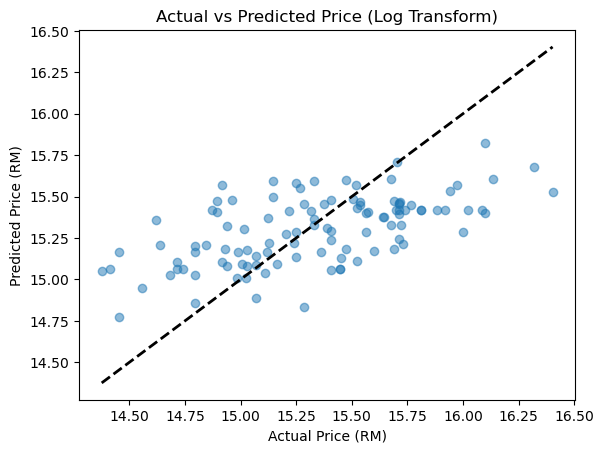

In [38]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price (RM)')
plt.ylabel('Predicted Price (RM)')
plt.title('Actual vs Predicted Price (Log Transform)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

Below is the scatter plot of actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

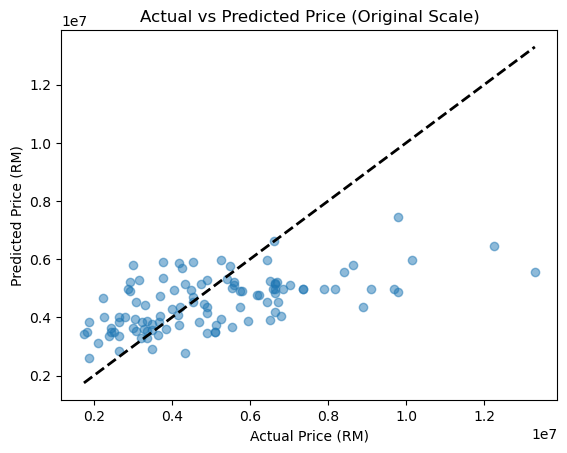

In [39]:
y_test_original = np.exp(y_test)  # Back-transform actual prices
y_pred_original = np.exp(y_pred)  # Back-transform predicted prices

# Scatter plot of actual vs predicted values
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.xlabel('Actual Price (RM)')
plt.ylabel('Predicted Price (RM)')
plt.title('Actual vs Predicted Price (Original Scale)')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)  # Diagonal line
plt.show()

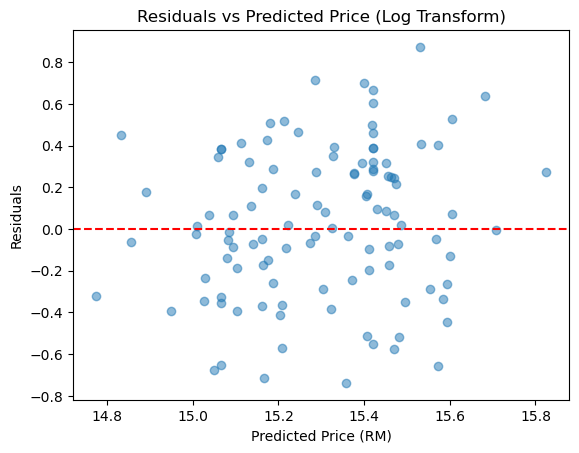

In [40]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero
plt.xlabel('Predicted Price (RM)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price (Log Transform)')
plt.show()

From the figure above, 

1. The residuals are randomly scattered around 0, indicating the model’s errors are random. It means the model is capturing the relationship between features and price well.

2. There is no curved pattern, funnel shape, or trend in the residuals.

3. There are a few outliers below -0.6 and above 0.6. Residuals belows -0.6 means the model overpredict the price for these data points. For residuals above 0.6, it indicates the model underpredict the price for these data points.

4.  Compare to previous plot, the residuals are closer to 0, indicating smaller errors.


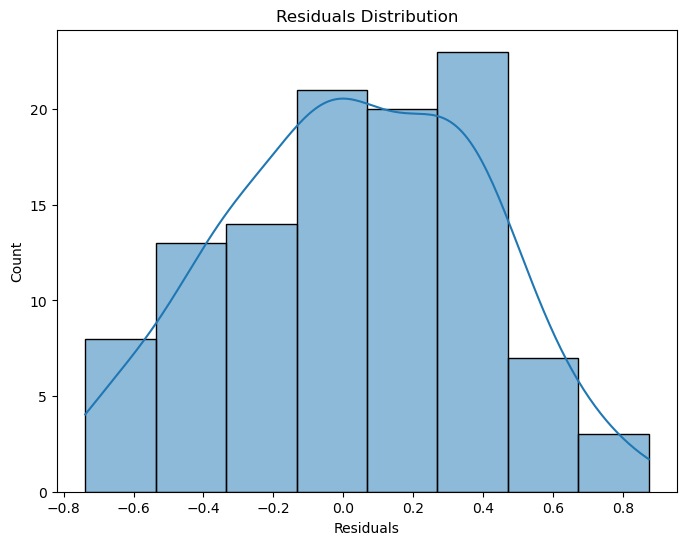

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

From the histogram above,

1. The residuals range from -0.8e6(-0.8 million) to 0.8(0.8 million). A positive residual indicates underprediction and a negative residual indicates overprediction.

2. The distribution is close to normal distribution indicating that the residuals are symmetrically distributed around zero. This indicates that the model's predictions are generally unbiased.

3. The highest count of residuals is around 0.4, suggesting the model is slightly underpredicting for some properties. This is not a major issue as the KDE line shows the overall distribution is centered around 0.0 and it is almost symmetric distribution.

4. The highest count at 0.4 means most of the residuals are clustered around 0.4. The actual value is 0.4(1.49 times) higher than the predicted value. In other words, the model is underpredicting for these data points. 

Note: e^0.49 ≈ 1.49

## Comparison Table

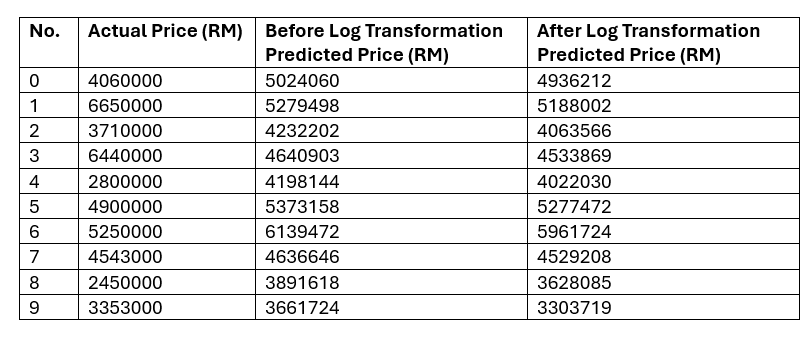
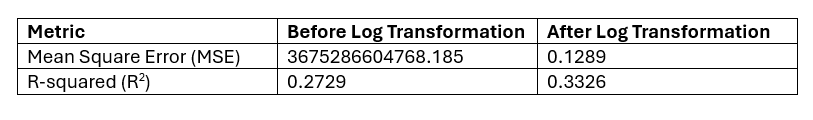

The log transformation significantly improved the performance of the simple linear regression model by reducing the impact of skewness and outliers as well as linearizing the relationship between area and price.

The MSE decreased dramatically from 3,675,286,604,768.185 to 0.1289, indicating that the model's predictions are now much more accurate. The R² increased from 0.2729 to 0.3326, meaning the model now explains more of the variance in price. 

However, there is still room for improvement, as the model only explains 33.26% of the variance in price. It can consider adding more features to further enhance performance.

## Multiple Linear Regression

Multiple linear regression extends simple linear regression by combining multiple independent variables to model the relationship with the dependent variable.

### 2 Features

The 2 features selected is based on the heatmap. 'Area' and 'Bathroom' has the most highest positive correlation with 'Price' compared to others features.

In [42]:
X = data[['area', 'bathrooms']]
y = data['price']


# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Print the model's coefficient (slope) and intercept
print(f"Coefficient (Slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): [0.44073413 0.29363972]
Intercept: 11.197809801788305


The <b>first coefficient</b> is 0.4407 means for every 1 square foot increase in area, the log-transformed price of the property increases by approximately RM 0.4407. For example, if the area increases by 100 square feet, the price is expected to increase by 0.4407 × 100 = RM 44.07.

The <b>second coefficient</b> is 0.2936 means for every additional bathroom, the price of the property increases by approximately RM 0.2936. 

<br>The <b>intercept</b> is 11.1978 which means that if a property has 0 area and 0 bathrooms, the model predicts its price to be RM 11.1978.

<br> Note:
The intercept often does not have a meaningful real-world interpretation because a property with 0 area does not exist. It is more of a mathematical starting point for the regression line.

The multiple linear regression equation is 
<center> Price = Intercept + (Coefficient 1 × Area) + (Coefficient 2 × Bathroom) </center>

Substitute the value: 
<center> Price = 11.1978 + 0.4407 × Area + 0.2936 x Bathroom</center> 

If a property has an area of 100 square feet and 2 bathrooms, the predicted price would be:

<center>Price = 11.1978 + 0.4407 × 100 + 0.2936 x 26 </center>

The log-transformed price will be RM 55.85.

In [45]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.10604023845830204
R-squared: 0.4508212006322454


We can see that the multiple linear regression model outperforms the simple linear regression model in terms of both MSE and R². The MSE for the multiple linear regression model is 0.1060, which is lower than the simple linear regression model's MSE (0.1289). This indicates that the multiple linear regression model has better predictive accuracy. Additionally, the multiple linear regression model includes additional independent variables (bathrooms), which provide more information to explain the variation in price. This leads to better predictions and a higher R². However, there is still room for improvement, as the model only explains 45.08% of the variance in price.

In [46]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.611855
1,15.710127,15.654540
2,15.126542,15.151306
3,15.678039,15.245267
4,14.845130,15.142491
5,15.404746,15.375570
6,15.473739,15.480169
7,15.329098,15.538025
8,14.711599,15.054048
9,15.025366,14.973693


Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [47]:
results = pd.DataFrame({
    'Actual Price (RM)': np.exp(y_test),  # Actual prices from the test set
    'Predicted Price (RM)': np.exp(y_pred)  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4059999,6027572
1,6650000,6290429
2,3709999,3803018
3,6439999,4177682
4,2800000,3769642
5,4900000,4759106
6,5250000,5283868
7,4542999,5598585
8,2450000,3450564
9,3352999,3184140


In [48]:
import plotly.graph_objects as go

# Assuming X and y are your feature and target variables
# X is of shape (n_samples, 2) and y is the target variable (n_samples,)

# Convert y to a NumPy array for reshaping
y = y.to_numpy().reshape(-1)  # Convert and reshape y

# Create the scatter plot for actual data points (X, y)
scatter_points = go.Scatter3d(
    x = X.iloc[:, 0],  # First feature (X1)
    y = X.iloc[:, 1],  # Second feature (X2)
    z = y,             # Target variable (y)
    mode = 'markers',  # Scatter plot mode
    marker = {"size": 5, "color": "blue"},
    name = 'Data Points'
)

# Create the scatter plot for predicted data points (X, y_pred)
scatter_points_pred = go.Scatter3d(
    x = X.iloc[:, 0],  # First feature (X1)
    y = X.iloc[:, 1],  # Second feature (X2)
    z = y_pred.reshape(-1),  # Predicted target variable (y_pred)
    mode = 'markers',
    marker = {"size": 5, "color": "red"},
    name = 'Predicted Points'
)

# Get the coefficients from the trained model
coef0 = model.intercept_.squeeze()  # Intercept term
coef1 = model.coef_.squeeze()[0]  # Coefficient for X1
coef2 = model.coef_.squeeze()[1]  # Coefficient for X2

# Create a meshgrid for the X1 and X2 features
mesh_X1, mesh_X2 = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 10),
                               np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 10))
mesh_y = coef0 + (coef1 * mesh_X1 + coef2 * mesh_X2)  # Calculated surface

# Plot the regression plane (fitted surface)
surface_plane = go.Surface(x = mesh_X1, y = mesh_X2, z = mesh_y,
                           opacity = 0.7, colorscale = 'Viridis',
                           showscale = False,
                           name = 'Fitted Plane')

# Create the figure with the scatter points and surface plane
fig = go.Figure(data = [scatter_points, scatter_points_pred, surface_plane])

# Update layout and titles
fig.update_layout(
    scene = {
        "xaxis_title": "Feature 1",
        "yaxis_title": "Feature 2",
        "zaxis_title": "Target Variable"
    },
    width = 720,
    height = 600,
    scene_camera = { "eye": {"x": -1, "y": -1.5, "z": 1.5} },
    title = {
        "text": "3D Linear Regression Plot",
        "font": {"size": 20},
        "x": 0.5,
        "xanchor": "center"
    }
)

# Show the figure
fig.show()


### 5 Features

We further improve the model by adding additional features such as selecting the top 5 features in the heatmap.

In [49]:
X = data[['area', 'bathrooms', 'airconditioning', 'stories', 'parking']] 
y = data['price']


# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
print(f"Coefficient (Slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): [0.35757733 0.21148463 0.16834929 0.07906299 0.04916766]
Intercept: 11.779516289415486


In [52]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.07947798081641037
R-squared: 0.588386232287726


The MSE is 0.0795, which is lower than the previous MSE of 0.1060 (from the 2-feature model). This means the new model has better predictive accuracy. The R² is 0.5884, meaning that 58.84% of the variance in price is explained by the 5 features. This is significantly higher than the R² of 0.4508 from the 2-feature model, indicating that the new model explains more of the variance in price.

The reason of improvement after adding relevant features

- Airconditioning
    - The inclusion of air-condition are likely to have higher price.
- Stories
    - The number of stories in a property can influence its price, as multi-story properties are often more desirable.
- Parking
    - The availability of parking spaces can also affect the price, as properties with parking are typically more valuable.

While the new model performs better, it still only explains 58.84% of the variance in price. This means there are other factors that influence price but are not included in the model.

In [53]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.514519
1,15.710127,15.747394
2,15.126542,15.039386
3,15.678039,15.363031
4,14.845130,15.032234
5,15.404746,15.221337
6,15.473739,15.572885
7,15.329098,15.405451
8,14.711599,15.009647
9,15.025366,14.895285


Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [54]:
results = pd.DataFrame({
    'Actual Price (RM)': np.exp(y_test),  # Actual prices from the test set
    'Predicted Price (RM)': np.exp(y_pred)  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4059999,5468519
1,6650000,6902501
2,3709999,3400340
3,6439999,4699803
4,2800000,3376108
5,4900000,4078895
6,5250000,5797194
7,4542999,4903456
8,2450000,3300704
9,3352999,2944015


### All Features

We include all features to verify whether it will maximize the model perfomance.

In [55]:
X = data.drop('price', axis=1)
y = data['price']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Print the model's coefficient (slope) and intercept
print(f"Coefficient (Slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): [ 0.29611112  0.02036619  0.18487034  0.0826878   0.0888831   0.03619243
  0.10412412  0.13184893  0.14564444  0.0331118   0.13323133  0.03992782
  0.03490396 -0.07483178]
Intercept: 12.125391919730905


In [58]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.06212936343503208
R-squared: 0.6782341334497208


With the inclusion of all features, the MSE is 0.0621, which is lower than the previous MSE of 0.0795 (from the 5-feature model). It has even better predictive accuracy. The R² is 0.6782, meaning that 67.82% of the variance in price is explained by all the features in the model. This is greatly higher than the R² of 0.5884 from the 5-feature model, indicating that this model (all features) explains more of the variance in price.

In [59]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.375423
1,15.710127,15.811706
2,15.126542,15.016376
3,15.678039,15.328204
4,14.845130,15.035844
5,15.404746,15.077681
6,15.473739,15.474584
7,15.329098,15.665775
8,14.711599,14.821718
9,15.025366,14.833552


Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [60]:
results = pd.DataFrame({
    'Actual Price (RM)': np.exp(y_test),  # Actual prices from the test set
    'Predicted Price (RM)': np.exp(y_pred)  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4059999,4758406
1,6650000,7360996
2,3709999,3322992
3,6439999,4538937
4,2800000,3388316
5,4900000,3533081
6,5250000,5254440
7,4542999,6361498
8,2450000,2735208
9,3352999,2767769


## Comparison Table

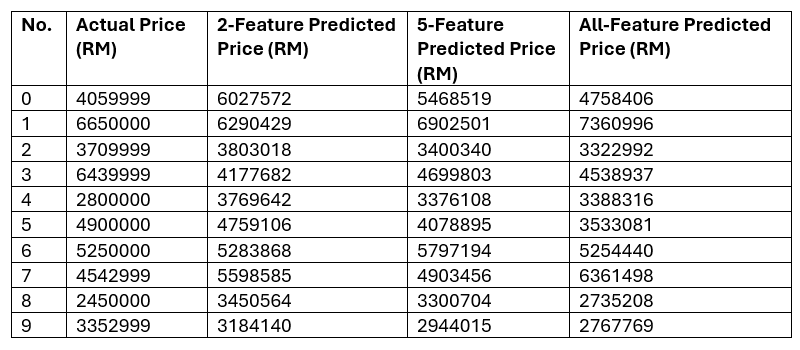
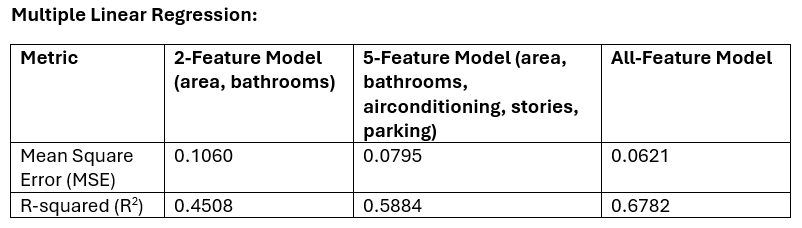

Each time additional features are added, the model performs better in terms of both prediction accuracy (lower MSE) and explanatory power (higher R²). This can be explained that additional features are relevant and contribute meaningfully to explain and predict price.

Among three (3) models, the all-feature multiple linear regression model outperforms the other models in terms of both MSE(0.0621) and R²(0.6782). The improvement is because of the inclusion of all relevant features, which provide more information to explain and predict price.

## Polynomial Regression

Polynomial regression is an extension of linear regression that models nonlinear relationships by adding polynomial terms (squared and cubed) to the equation. It allows the model to fit curved data more effectively.

In polynomial regression, the degree refers to the highest power of the independent variable. The degree determines how complex the polynomial model will be. Too low may underfit and too high may overfit. If the degree = 2, it creates features like X, X². If the degree = 3, it creates features like X, X², X³. 

### Degree = 2, 1 Feature

In [61]:
X = data[['area']]  # Independent variable
y = data['price']   # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train) # Transform the training data (X_train) into polynomial features
X_test_poly = poly.transform(X_test) # Transform the testing data (X_train) into polynomial features

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [63]:
# Print the model's coefficient (slope) and intercept
print(f"Coefficient (Slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): [ 0.          1.45908056 -0.05556082]
Intercept: 6.939214000822185


- <b>First Coefficient(β0):</b> 0
    - It is refer to bias term/intercept term added by PolynomialFeatures.
    - The first 0 is just a placeholder and does not contribute anything to the model.
    - <b>Note:</b> In the output from <i>model.coef_</i>, the first number is always 0 because it does not affect the equation directly. The actual intercept is stored separately in <i>model.intercept_</i>. If the first coefficient is not 0, it would conflict with <i>model.intercept_</i> because there are two values representing the intercept.

- <b>Second Coefficient(β1):</b> 1.45908056
    - It means that for every 1-unit increase in area, the price increases by RM 1.459.

- <b>Third Coefficient(β2):</b> -0.05556082
    - The negative sign indicates that the curve bends downwards(concave shape), showing that price does not increase indefinitely and eventually decreases (diminishing return). In simple words, the price increases as the area gets bigger, but only up to a certain point. After that, the price stops going up and starts to go down.

- <b>Intercept:</b> 6.939214000822185
    - It represents the baseline price when the area is zero. However, this might not have a meaningful interpretation because a house with zero area does not exist.

Hence, the polynomial regression is: 
<center> Price = Intercept + (β1 * Area) + (β2 * Area²) </center>

If the area of a house is 10 units:

<center> Price = 6.9392 + 1.4591 * 10 − 0.0556 * 10² </center>

The predicted price will be RM 15.97. If we transform it to the original scale, it will be RM 8623486.27

In [64]:
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.1284588286051254
R-squared: 0.3347160824304266


- MSE = 0.1285 means that the model’s predictions are off by about RM 0.1285 from the actual values on average.

- The model explains 33.5% of the variance in the price data. This is a relatively low value, suggesting that the model is not capturing the full relationship between 'area' and 'price'.

Polynomial regression with only 1 feature perform slighlty better than simple linear regression model because it captures nonlinear relationships which simple linear regression cannot do. However, its performance worse than multiple linear regression models. It can be the reason that this polynomial regression model only use 1 feature which missing the influence of other important features.

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



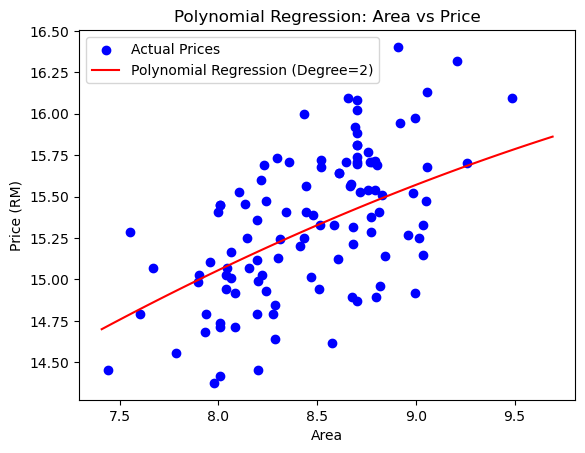

In [65]:
# Generate a dense range of X values based on the full range of training data
X_dense = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Use the full dataset range

# Transform the dense X values to polynomial features
X_dense_poly = poly.transform(X_dense)

# Predict the corresponding Y values for the dense X range
y_dense_pred = model.predict(X_dense_poly)

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')  # Plot test data
plt.plot(X_dense, y_dense_pred, color='red', label=f'Polynomial Regression (Degree={degree})')  # Plot the curve
plt.xlabel('Area')
plt.ylabel('Price (RM)')
plt.title('Polynomial Regression: Area vs Price')
plt.legend()
plt.show()

The curve appears to bend slightly, indicating that the quadratic term is capturing some non-linearity in the data. It suggests that the relationship between Area and Price is mostly linear with a small nonlinear component. As the Area increases, the Price increases at a diminishing rate for higher values of the area. In simple words, adding more area has a bigger impact on Price for smaller houses than for larger houses.

In [66]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.419286
1,15.710127,15.466633
2,15.126542,15.224144
3,15.678039,15.335960
4,14.845130,15.213395
5,15.404746,15.482664
6,15.473739,15.593401
7,15.329098,15.334933
8,14.711599,15.103086
9,15.025366,14.998985


Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [67]:
results = pd.DataFrame({
    'Actual Price (RM)': np.exp(y_test),  # Actual prices from the test set
    'Predicted Price (RM)': np.exp(y_pred)  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4059999,4971768
1,6650000,5212825
2,3709999,4090361
3,6439999,4574279
4,2800000,4046628
5,4900000,5297068
6,5250000,5917358
7,4542999,4569585
8,2450000,3623990
9,3352999,3265700


### Degree 2, 5 Features

In [68]:
X = data[['area', 'bathrooms', 'airconditioning', 'stories', 'parking']] 
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [70]:
# Print the model's coefficient (slope) and intercept
print(f"Coefficient (Slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): [ 0.          1.36775737 -0.38605471 -0.24959745  1.06692436  0.00898894
 -0.05558878  0.08032397  0.07220482 -0.11347629  0.01343116  0.00334696
  0.06647616 -0.0471505  -0.0239863  -0.24959745 -0.01368365 -0.01564014
  0.00936781  0.01651682 -0.03164137]
Intercept: 7.124184913093465


Below shows the calculation of each coefficient value <br>

    1. Area: 1.36775737 
    2. Bathrooms: -0.38605471 
    3. Airconditioning: -0.24959745  
    4. Stories: 1.06692436  
    5. Parking: 0.00898894

    6. Area²: -0.05558878
    7. Area * Bathrooms: 0.08032397
    8. Area * Airconditioning: 0.07220482
    9. Area * Stories: -0.11347629
    10. Area * Parking: 0.01343116

    11. Bathrooms²: 0.00334696
    12. Bathrooms * Airconditioning: 0.06647616
    13. Bathrooms * Stories: -0.0471505
    14. Bathrooms * Parking: -0.0239863

    15. Airconditioning²: -0.24959745
    16. Airconditioning * Stories: -0.01368365
    17. Airconditioning * Parking: -0.01564014

    18. Stories²: 0.00936781
    19. Stories * Parking: 0.01651682

    20. Parking²: -0.03164137

Based on the coefficient value above, <br>
a) Area, Stories, and Parking have positive linear effects on Price. <br>
b) Bathrooms and Airconditioning have negative linear effects on Price.<br><br>

Lets take some examples to interpret: <br>
<b>a) Area * Bathrooms: 0.08032397</b> <br>
    - The positive coefficient means that the effect of Area on Price increases as the number of Bathrooms increases. <br>

<b>b) Airconditioning * Stories: -0.01368365</b><br>
    - The number of Airconditioning units increases, the effect of Stories on Price decreases. Similarly, the number of Stories increases, the effect of Airconditioning on Price decreases. For example, for houses with more Stories, adding an extra Airconditioning unit has a smaller impact on Price. For houses with more Airconditioning units, adding an extra Story has a smaller impact on Price.

<b>c) Parking²: -0.03164137</b><br>
    - The number of Parking spaces increases, the rate of increase in Price slows down. In other words, the relationship between Parking and Price is diminishing. For example, adding 1 parking space to a house with no parking will significantly increase the price. Adding a second parking space will still increase the price, but not as much as the first one.<br>

    
<b>Intercept</b> is 7.124184913093465 which represents the baseline price when all features are 0.

In [71]:
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.07625088924280919
R-squared: 0.6050992301233259


The polynomial regression model with 5 features performs slightly better than the multiple linear regression model(5-feature) because
- It captures non-linear relationships and interactions between the features.
- It is more flexible and can model curved relationships.
- It achieves lower MSE and higher R², indicating better predictive accuracy and explanatory power.

In [72]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.536537
1,15.710127,15.739366
2,15.126542,15.019976
3,15.678039,15.341429
4,14.845130,15.011726
5,15.404746,15.214915
6,15.473739,15.591357
7,15.329098,15.399642
8,14.711599,15.004935
9,15.025366,14.845163


Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [73]:
results = pd.DataFrame({
    'Actual Price (RM)': np.exp(y_test),  # Actual prices from the test set
    'Predicted Price (RM)': np.exp(y_pred)  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4059999,5590264
1,6650000,6847306
2,3709999,3334977
3,6439999,4599364
4,2800000,3307575
5,4900000,4052784
6,5250000,5905274
7,4542999,4875057
8,2450000,3285189
9,3352999,2800091


### Degree 2, All Features

In [74]:
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [76]:
# Print the model's coefficient (slope) and intercept
print(f"Coefficient (Slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): [-2.12132433e+07 -1.60173359e+10  2.96425584e+09  2.48442772e+09
  3.26480767e+09  5.56352599e+08 -8.49686895e+09  3.57876573e+09
  1.29072931e+10  6.20003530e+09 -1.04371965e+09  3.08441613e+09
  1.36243211e+09 -5.23687512e+09 -8.39854454e+07 -8.61015320e-02
 -3.12614441e-02  8.76455307e-02 -4.25796509e-02 -2.71617174e-02
 -2.30999470e-01  7.14340210e-02 -3.20386648e-01  3.10714245e-02
 -2.92997360e-02  2.37085819e-02  1.60173359e+10  1.60173359e+10
  1.60173359e+10 -1.77438259e-02  7.99236298e-02 -3.15122604e-02
  3.81428003e-02  7.22253323e-02 -2.61375904e-02  1.78553462e-01
 -3.30430269e-02  3.88011932e-02  6.86359406e-03 -2.96425583e+09
 -2.96425584e+09 -2.96425584e+09  6.65330887e-03 -7.63473511e-02
  1.47762895e-02 -4.85172272e-02 -1.64704531e-01 -1.50790334e-01
  1.02859855e-01 -6.47413731e-03  2.98556089e-02 -2.48442772e+09
 -2.48442772e+09 -2.48442772e+09  3.90796661e-02 -4.40449715e-02
 -5.53302765e-02 -1.27673149e-03 -8.21710229e-02  3.72507572e-02
 -5.

In [77]:
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 3.888312670839766e+16
R-squared: -2.0137439477542294e+17


An extremely high MSE value and negative R² value indicating overfitting and failing to generalize. A negative R² also means the model’s predictions are worse than simply predicting the mean of the target variable. Overfitting happens when a model learns the noise or irrelevant patterns in the training data instead of the underlying pattern. As a result, the model performs well on the training data but poorly on new, unseen data. The another reason is independent variables are highly correlated with one another. Polynomial regression magnify this problem because it adds interaction terms and squared terms, further increasing correlations between features. 

We have 14 features which means it can produce 120 terms. The model becomes so complex that it fits the training data perfectly but fails to capture the true relationship. 

In [78]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.466160
1,15.710127,15.806305
2,15.126542,15.129104
3,15.678039,15.301193
4,14.845130,15.108337
5,15.404746,15.016224
6,15.473739,15.502350
7,15.329098,15.515075
8,14.711599,14.904489
9,15.025366,14.912338


Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [79]:
# Replace NaN, positive infinity, and negative infinity in y_test and y_pred with 0.0
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0)
y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=0.0, neginf=0.0)

# Apply exponential transformation
actual_prices = np.exp(y_test)
predicted_prices = np.exp(y_pred)

# Handle non-finite values after np.exp
actual_prices = np.nan_to_num(actual_prices, nan=0.0, posinf=0.0, neginf=0.0)
predicted_prices = np.nan_to_num(predicted_prices, nan=0.0, posinf=0.0, neginf=0.0)

# Build the DataFrame
results = pd.DataFrame({
    'Actual Price (RM)': actual_prices,
    'Predicted Price (RM)': predicted_prices
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

# Convert to integers
results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

# Display the first 10 rows
display(results.head(10))


C:\Users\HP\AppData\Local\Temp\ipykernel_7024\1425285249.py:7: RuntimeWarning:

overflow encountered in exp



,Actual Price (RM),Predicted Price (RM)
0,4059999,5210360
1,6650000,7321345
2,3709999,3719516
3,6439999,4417979
4,2800000,3643069
5,4900000,3322485
6,5250000,5402377
7,4542999,5471566
8,2450000,2971238
9,3352999,2994650


### Degree 2, Selected Features

Those features that has correlation up to 0.30 above will be chosen for this model to reduce the model complexity instead of including all features.

In [80]:
columns_to_drop = ['price', 'furnishingstatus_unfurnished', 'furnishingstatus_semi-furnished', 'basement', 'hotwaterheating', 'guestroom']
X = data.drop(columns=columns_to_drop)
y = data['price']   # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.07571832959940565
R-squared: 0.6078573384585035


By selecting only relevant features, the model becomes less complex and avoids overfitting. The polynomial model can now focus on the most important patterns in the data, leading to better generalization on the test set. The MSE and R² now is 0.0757 and 0.6079 respectively, indicating that the model's predictions are very close to the actual values. The error is small, suggesting good performance. In short, the polynomial model with selected features performs much better because it avoids overfitting by focusing on the most relevant features.

In [83]:
results = pd.DataFrame({
    'Actual Price (RM)': y_test,  # Actual prices from the test set
    'Predicted Price (RM)': y_pred  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,15.216694,15.306035
1,15.710127,15.737647
2,15.126542,14.998108
3,15.678039,15.265724
4,14.845130,15.179040
5,15.404746,15.217466
6,15.473739,15.673897
7,15.329098,15.596343
8,14.711599,14.794983
9,15.025366,14.947887


Below are the actual and predicted prices in the original scale, obtained by applying the exponential function to reverse the log transformation.

In [84]:
results = pd.DataFrame({
    'Actual Price (RM)': np.exp(y_test),  # Actual prices from the test set
    'Predicted Price (RM)': np.exp(y_pred)  # Predicted prices from the model
})

# Reset the index for better readability
results.reset_index(drop=True, inplace=True)

results['Actual Price (RM)'] = results['Actual Price (RM)'].astype(int)
results['Predicted Price (RM)'] = results['Predicted Price (RM)'].astype(int)

display(results.head(10))

,Actual Price (RM),Predicted Price (RM)
0,4059999,4439421
1,6650000,6835545
2,3709999,3262839
3,6439999,4264024
4,2800000,3909968
5,4900000,4063138
6,5250000,6413379
7,4542999,5934795
8,2450000,2663051
9,3352999,3103023


## Comparison Table

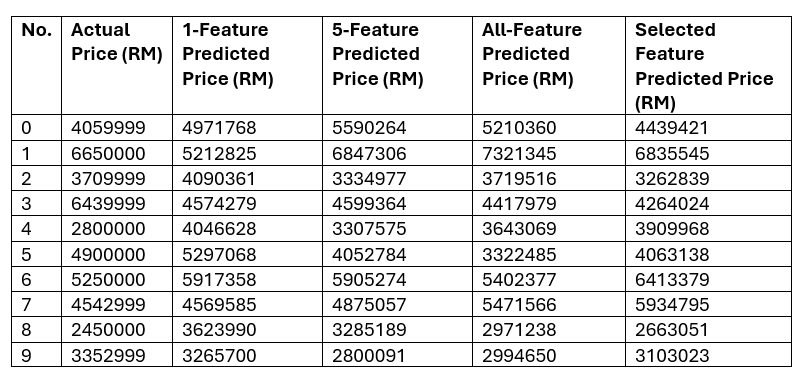
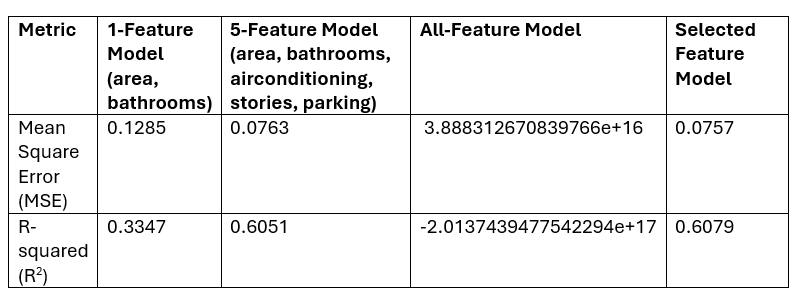

The 5-feature model performs better than the 1-feature model because it captures more of the relationship between the features and the target variable. However, adding all features leads to overfitting, as seen in the poor performance of the all-feature model. Therefore, relevant features are selected to reduce the model complexity. The selected feature model performs slightly better than the 5-feature model, likely because it uses only the most relevant features, reducing noise and improving generalization.

# Summary

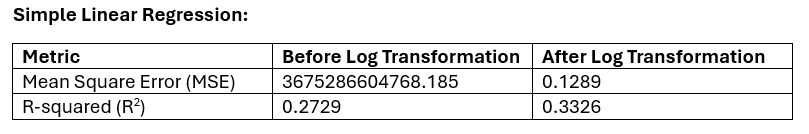
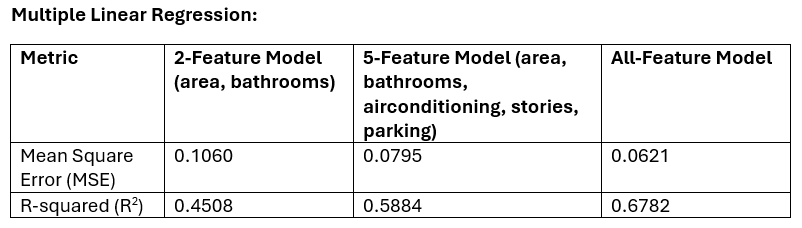
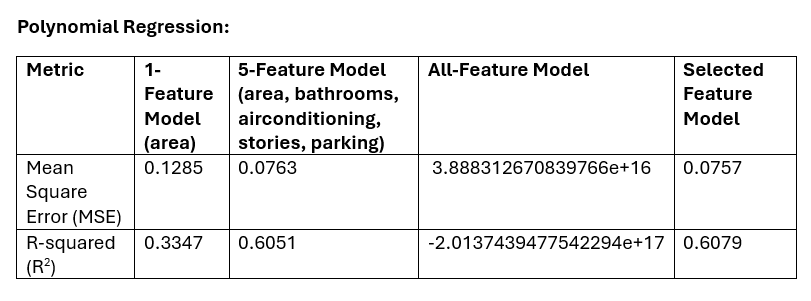

In conclusion, multiple linear regression with all features surpasses simple linear regression model and polynomial regression model. There are a few reasons:

1) Simple Linear regression is a simple and easy model to implement but struggles to capture complex relationship. It is only limited to 1 feature which will miss out other important relevant features. Furthermore, we can see that there is a significant improvent after log transformation but it is not enough to achieve for optimal predictions.

2) Multiple Linear Regression is less likely to overfit and does not overcomplicate the relationship between features and target variable.

3) Multiple Linear Regression is also easier to interpret because the coefficients directly represent the effect of each feature on the target variable. On the other hand, Polynomial Regression has interaction and quadratic terms which make it harder to interpret.

4) Not only that, Polynomial Regression with many features can easily overfit the training data. This means it captures noise or irrelevant patterns which leading to poor performance on new data.

Hence, the final result is Multiple Linear Regression model with all features will be the best option to achieve the lowest MSE and highest R².

# References

- ML_Lab07_LinearRegression
- https://www.kaggle.com/datasets/ashydv/housing-dataset 
- https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
- https://www.geeksforgeeks.org/regression-in-machine-learning/
- https://www.geeksforgeeks.org/ml-linear-regression/